# Importando Bibliotecas e definindo funções

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

Definição de funções:

In [2]:
def plot_dados(data_1, data_2):

    plt.title("Projeção dos dados normais")
    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")

    plt.scatter(data_1[:, 0], data_1[:, 1], color='red', label='Data_1')
    plt.scatter(data_2[:, 0], data_2[:, 1], color='blue', label='Data_2')

    plt.grid(True)
    plt.legend()

    plt.show()


def preproces(data_1, data_2, num_dados, test_size):

    # juntando dados
    data = np.vstack((data_1, data_2))
    data_label = np.hstack((np.ones(num_dados), np.full(num_dados, 2)))

    # embaralhando dados
    indices = np.random.permutation(len(data))
    data = data[indices]
    data_label = data_label[indices]

    # dividindo em treino e teste
    data_train, data_test, label_train, label_test = train_test_split(data, data_label, test_size=test_size ,random_state=42, shuffle=True)

    return data_train, data_test, label_train, label_test, data, data_label


def lda_accuracy(data_train, data_test, label_train, label_test, lda):

    label_pred_train = lda.predict(data_train)
    accuracy = accuracy_score(label_train, label_pred_train)
    print(f"Acurácia do LDA sob o conjunto de treinamento: {accuracy:.2f}")

    label_pred_test = lda.predict(data_test)
    accuracy = accuracy_score(label_test, label_pred_test)
    print(f"Acurácia do LDA sob o conjunto de teste: {accuracy:.2f}")


def plot_projection(data_lda, label):

    plt.figure(figsize=(8, 2))
    plt.scatter(data_lda[label == 1].ravel(), np.zeros(len(data_lda[label == 1])), color='red', label='Classe 1')
    plt.scatter(data_lda[label == 2].ravel(), np.zeros(len(data_lda[label == 2])), color='blue', label='Classe 2')

    # Configurações do gráfico
    plt.title("Dados projetados na primeira componente do LDA")
    plt.xlabel("Componente 1 do LDA")
    plt.yticks([])  # Removendo o eixo y, pois estamos projetando em 1D
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_reta(data_1, data_2, data, projecao_lda):
    
    plt.title("Projeção dos dados normais")
    plt.xlabel("Dimensão 1")
    plt.ylabel("Dimensão 2")

    plt.scatter(data_1[:, 0], data_1[:, 1], color='red', label='Data_1')
    plt.scatter(data_2[:, 0], data_2[:, 1], color='blue', label='Data_2')

    # Calculando a origem da reta (média dos dados)
    origin = np.mean(data, axis=0)
    # Definindo a reta a partir do vetor de projeção
    # Ponto inicial e final da reta (escalamos o vetor para visibilidade)
    ponto_inicial = origin - 75 * projecao_lda
    ponto_final = origin + 75 * projecao_lda

    # Adicionando a reta baseada no vetor de projeção
    plt.plot([ponto_inicial[0], ponto_final[0]], [ponto_inicial[1], ponto_final[1]], color='green', label='Reta de Projeção LDA')

    plt.grid(True)
    plt.legend()

    plt.show()


# 1 - Experimentos com dados 2D originados de distribuições normais

Gerando dados e plotando dados:

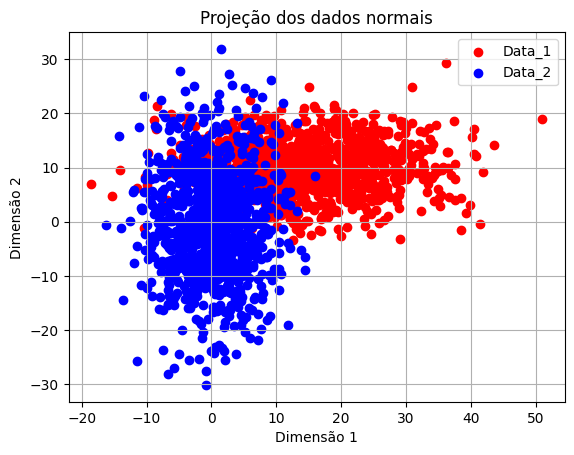

In [69]:
num_dados = 1000

data_1 = np.zeros((num_dados,2))
data_2 = np.zeros((num_dados,2))

for i in range(num_dados):
    a = np.random.normal(15, 10)
    b = np.random.normal(10, 5)

    c = np.random.normal(0, 5)
    d = np.random.normal(0, 10)

    data_1[i] = [a,b]
    data_2[i] = [c,d]

plot_dados(data_1, data_2)

Realizando experimento com test_size igual a 10%:

Acurácia do LDA sob o conjunto de treinamento: 0.87
Acurácia do LDA sob o conjunto de teste: 0.90


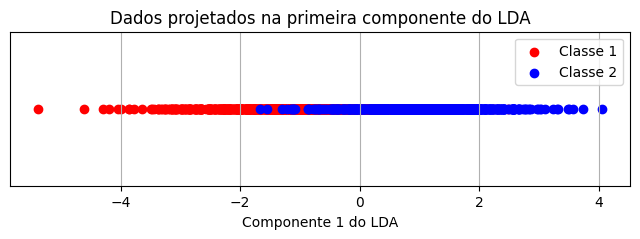

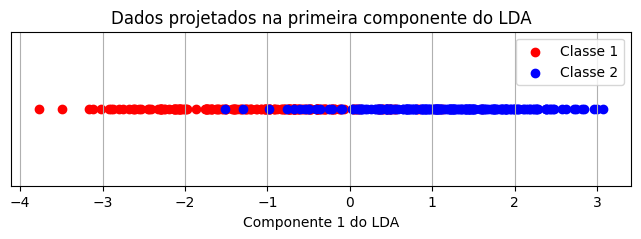

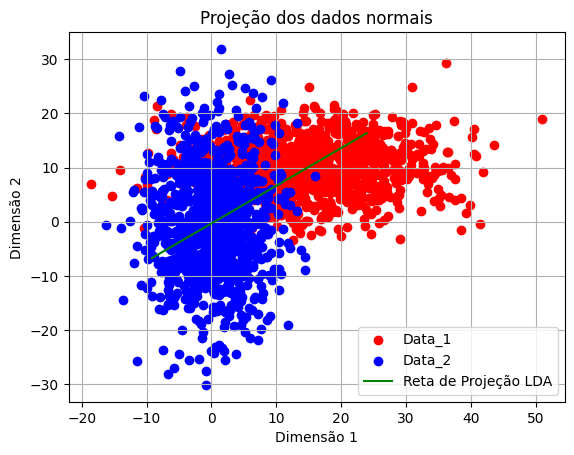

In [92]:
# divindo conjunto em treino e teste e fazendo treinamento do LDA
test_size = 0.2
data_train, data_test, label_train, label_test, data_normal, data_normal_label = preproces(data_1, data_2, num_dados, test_size)
lda = LDA(n_components=1)
data_train_lda = lda.fit(data_train, label_train).transform(data_train)
data_test_lda = lda.transform(data_test)

# calculando acurácia
lda_accuracy(data_train, data_test, label_train, label_test, lda)

# plotando dados projetados
plot_projection(data_train_lda, label_train)
plot_projection(data_test_lda, label_test)

#plotando reta de projeção no espaço original
projecao_lda = lda.coef_[0]
plot_reta(data_1, data_2, data_normal, projecao_lda)

Realizando experimento com test_size igual a 90%:

Acurácia do LDA sob o conjunto de treinamento: 0.90
Acurácia do LDA sob o conjunto de teste: 0.87


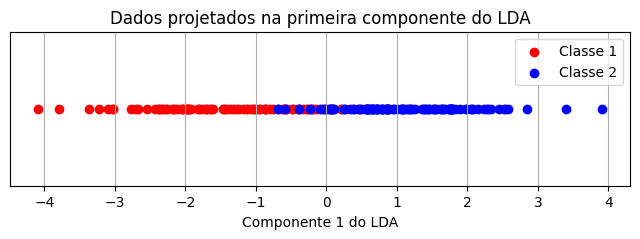

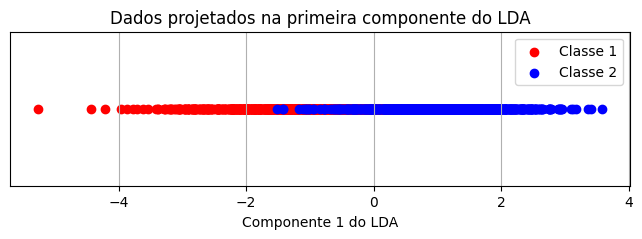

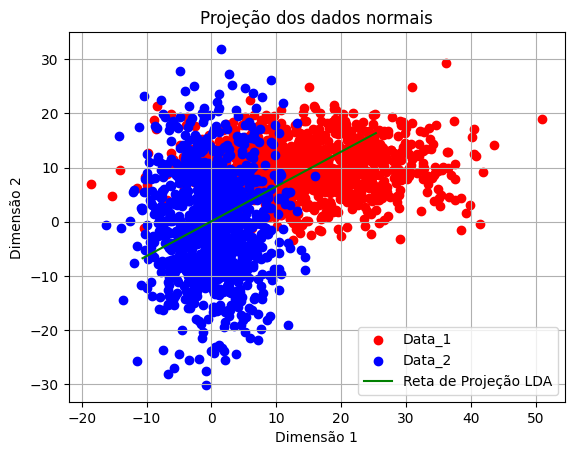

In [87]:
# divindo conjunto em treino e teste e fazendo treinamento do LDA
test_size = 0.9
data_train, data_test, label_train, label_test, data_normal, data_normal_label = preproces(data_1, data_2, num_dados, test_size)
lda = LDA(n_components=1)
data_train_lda = lda.fit(data_train, label_train).transform(data_train)
data_test_lda = lda.transform(data_test)

# calculando acurácia
lda_accuracy(data_train, data_test, label_train, label_test, lda)

# plotando dados projetados
plot_projection(data_train_lda, label_train)
plot_projection(data_test_lda, label_test)

#plotando reta de projeção no espaço original
projecao_lda = lda.coef_[0]
plot_reta(data_1, data_2, data_normal, projecao_lda)

# 2 - Fazendo teste com dados não normais

Gerando e plotando dados no espaço original:

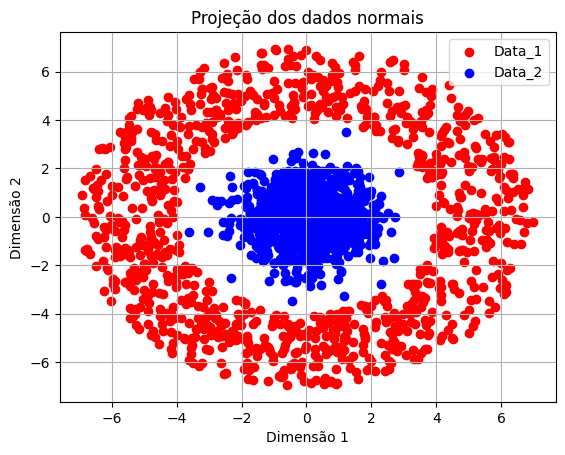

In [100]:
num_dados = 1000

raio_min = 4.0           # Raio mínimo (distância mínima do centro)
raio_max = 7.0           # Raio máximo

data_3 = np.zeros((num_dados,2))
data_4 = np.zeros((num_dados,2))

for i in range(num_dados):
    angles = np.random.uniform(0, 2 * np.pi)
    radii = np.random.uniform(raio_min, raio_max)

    a = radii * np.cos(angles)
    b = radii * np.sin(angles)

    c = np.random.normal(0,1)
    d = np.random.normal(0,1)

    data_3[i] = [a,b]
    data_4[i] = [c,d]

# plotando dados
plot_dados(data_3, data_4)

Realizando experimento com test_size igual a 10%:

Acurácia do LDA sob o conjunto de treinamento: 0.47
Acurácia do LDA sob o conjunto de teste: 0.49


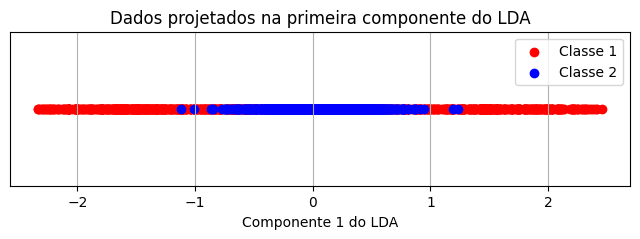

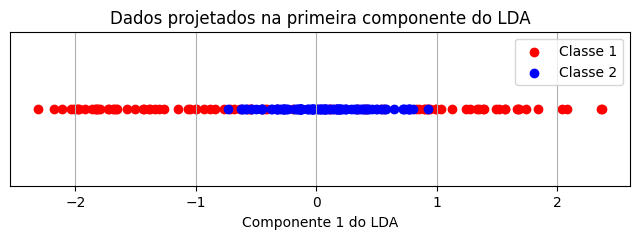

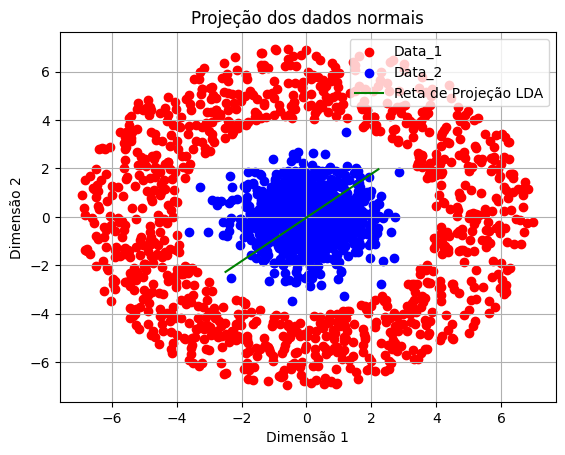

In [101]:
# divindo conjunto em treino e teste e fazendo treinamento do LDA
test_size = 0.1
data_train, data_test, label_train, label_test, data_qui, data_qui_label = preproces(data_3, data_4, num_dados, test_size)
lda2 = LDA(n_components=1)
data_train_lda2 = lda2.fit(data_train, label_train).transform(data_train)
data_test_lda2 = lda2.transform(data_test)

# calculando acurácia
lda_accuracy(data_train, data_test, label_train, label_test, lda2)

# plotando dados projetados
plot_projection(data_train_lda2, label_train)
plot_projection(data_test_lda2, label_test)

#plotando reta de projeção no espaço original
projecao_lda2 = lda2.coef_[0]
plot_reta(data_3, data_4, data_qui, projecao_lda2)

# 3 - Aplicação com Database real